In [195]:
from sqlalchemy import create_engine
import pandas as pd
import snowflake.connector
import matplotlib.pyplot as plt
import pickle
# connector 
conn = snowflake.connector.connect(
    user = "MEHTAJEETPARESH",
    password = "Jeetmehta12345",
    account = "xo45240.us-central1.gcp",
    role = 'NASA_ROLE',
    warehouse = "COMPUTE_WH",
    database = "NASA_PROJECT",
    schema = "EXOPLANET_DATA"
)

cursor = conn.cursor()
cursor.execute("USE DATABASE NASA_PROJECT;")
cursor.execute("USE SCHEMA EXOPLANET_DATA;")

In [191]:
# checking original dataset
df = pd.read_sql("""
            SELECT *
            FROM PSCOMPPARS
            LIMIT 5
            """, conn)


/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/2910441563.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


In [193]:
# checking transformed dataset
transformed_df = pd.read_sql("""
SELECT * FROM TRANSFORM_EXOPLANET LIMIT 5
""", conn)

transformed_df.head()


/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/1687618436.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transformed_df = pd.read_sql("""


,RIGHT_ASCENSION_DEG,DECLINATION_DEG,PLANET_EQ_TEMPERATURE_K,STAR_METALLICITY_DEX,DISCOVERY_METHOD,CONTROVERSIAL_FLAG,ORBITAL_AXIS_LIMIT
0,242.376234,-21.083140,1700.0,0.01486,Imaging,0.0,0.0
1,69.340553,26.850300,1450.0,0.01000,Imaging,0.0,0.0
2,20.712801,-24.664613,1600.0,0.01486,Imaging,0.0,0.0
3,59.791103,20.159976,2369.0,0.01486,Imaging,0.0,0.0
4,165.329539,-77.544091,2677.0,0.01486,Imaging,0.0,0.0


## ANALYSIS STARTS HERE ##

In [196]:
# 1. number of planets per discovery method ordered by count of number of planets
q1 = pd.read_sql("""
SELECT discovery_method, COUNT(*) AS num_planets
FROM TRANSFORM_EXOPLANET
GROUP BY discovery_method
ORDER BY num_planets DESC
""", conn)

with open("answers/q1_planets_by_hemisphere.pkl", "wb") as f:
    pickle.dump(q1, f)

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/2763029270.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q1 = pd.read_sql("""


In [198]:
# 2. average planet temperature per discovery method
q2 = pd.read_sql("""
SELECT discovery_method, AVG(planet_eq_temperature_k) AS avg_planet_eq_temp_k
FROM TRANSFORM_EXOPLANET
GROUP BY discovery_method
ORDER BY avg_planet_eq_temp_k DESC
""", conn)

with open("answers/q2_planets_avg_temp_discovery_method.pkl", "wb") as f:
    pickle.dump(q2, f)


/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/1301044439.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q2 = pd.read_sql("""


In [199]:
# 3. planet with max temperature
q3 = pd.read_sql("""
SELECT MAX(planet_eq_temperature_k) AS max_temp_k
FROM TRANSFORM_EXOPLANET
""", conn)

with open("answers/q3_planets_max_temp.pkl", "wb") as f:
    pickle.dump(q3, f)

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/2167246932.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q3 = pd.read_sql("""


In [200]:
# 4. number of controversial vs confirmed planets
q4 = pd.read_sql("""
SELECT controversial_flag, COUNT(*) AS count
FROM TRANSFORM_EXOPLANET
GROUP BY controversial_flag
""", conn)

with open("answers/q4_controversial_vs_confirmed_planets.pkl", "wb") as f:
    pickle.dump(q4, f)

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/2317102627.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q4 = pd.read_sql("""


In [105]:
# 5. average metallicity by discovery method
q5 = pd.read_sql("""
SELECT discovery_method, AVG(STAR_METALLICITY_DEX) AS avg_metallicity_dex
FROM TRANSFORM_EXOPLANET
GROUP BY discovery_method
ORDER BY avg_metallicity_dex DESC
""", conn)

q5.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/1979919766.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q5 = pd.read_sql("""


,DISCOVERY_METHOD,AVG_METALLICITY_DEX
0,Transit Timing Variations,0.017290
1,Transit,0.016299
2,Microlensing,0.014860
3,Radial Velocity,-0.001269
4,Imaging,-0.044209


In [116]:
# 6. count of planets in northern vs southern sky
q6 = pd.read_sql("""
SELECT
    CASE WHEN declination_deg >= 0 THEN 'North' ELSE 'South' END AS hemisphere,
    COUNT(*) AS num_planets
FROM TRANSFORM_EXOPLANET
GROUP BY hemisphere
""", conn)

q6.head()


/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/596204610.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q6 = pd.read_sql("""


,HEMISPHERE,NUM_PLANETS
0,South,843
1,North,3555


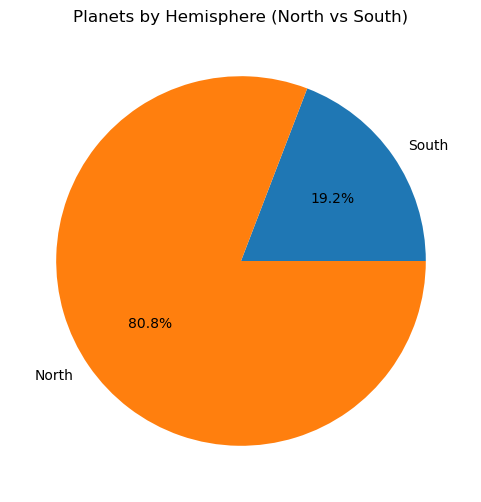

In [122]:
# 7. pie chart for the count of planets in northern vs southern sky
import matplotlib.pyplot as plt
q7 = q6.copy()
q7.set_index('HEMISPHERE')['NUM_PLANETS'].plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    ylabel=''
)
plt.title('Planets by Hemisphere (North vs South)')
plt.show()


In [109]:
# 8. hottest planets with high metallicity stars
q8 = pd.read_sql("""
SELECT *
FROM TRANSFORM_EXOPLANET 
WHERE star_metallicity_dex > 0.1
ORDER BY planet_eq_temperature_k DESC
LIMIT 10
""", conn)
q8.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/2783248043.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q7 = pd.read_sql("""


,RIGHT_ASCENSION_DEG,DECLINATION_DEG,PLANET_EQ_TEMPERATURE_K,STAR_METALLICITY_DEX,DISCOVERY_METHOD,CONTROVERSIAL_FLAG,ORBITAL_AXIS_LIMIT
0,225.686732,-3.031487,3353.0,0.29,Transit,0.0,0.0
1,292.247190,47.969543,2733.0,0.26,Transit,0.0,0.0
2,107.600231,-39.097271,2720.0,0.13,Transit,0.0,0.0
3,247.667000,49.046789,2609.0,0.22,Transit,0.0,0.0
4,97.636645,29.672266,2601.0,0.12,Transit,0.0,0.0


In [111]:
# 9. Planets with non zero orbital axis -> none are,lol
q9 = pd.read_sql("""
SELECT *
FROM TRANSFORM_EXOPLANET 
WHERE ORBITAL_AXIS_LIMIT > 0.0
LIMIT 10
""", conn)
q9.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/4145247619.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q8 = pd.read_sql("""


,RIGHT_ASCENSION_DEG,DECLINATION_DEG,PLANET_EQ_TEMPERATURE_K,STAR_METALLICITY_DEX,DISCOVERY_METHOD,CONTROVERSIAL_FLAG,ORBITAL_AXIS_LIMIT


In [114]:
# 10. Count of planets by quadrant (RA/DEC)
q10 = pd.read_sql("""
SELECT
    CASE
        WHEN RIGHT_ASCENSION_DEG > 180 AND declination_deg > 0 THEN 'Q1'
        WHEN RIGHT_ASCENSION_DEG <= 180 AND declination_deg > 0 THEN 'Q2'
        WHEN RIGHT_ASCENSION_DEG <= 180 AND declination_deg <= 0 THEN 'Q3'
        ELSE 'Q4'
    END AS sky_quadrant,
    COUNT(*) AS num_planets
FROM TRANSFORM_EXOPLANET
GROUP BY sky_quadrant
""", conn)
q10.head()


/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/1174752393.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q9 = pd.read_sql("""


,SKY_QUADRANT,NUM_PLANETS
0,Q4,407
1,Q2,447
2,Q3,436
3,Q1,3108


In [130]:
# 11. Standard deviation of planet temperatures by discovery method
q11 = pd.read_sql("""
SELECT discovery_method, STDDEV(planet_eq_temperature_k) as stddev_planet_eq_temperature_k
FROM TRANSFORM_EXOPLANET
GROUP BY discovery_method 
ORDER BY stddev_planet_eq_temperature_k DESC
""",conn)
q11.head()


/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/1264094043.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q11 = pd.read_sql("""


,DISCOVERY_METHOD,STDDEV_PLANET_EQ_TEMPERATURE_K
0,Orbital Brightness Modulation,NaN
1,Imaging,692.819441
2,Transit,450.822489
3,Transit Timing Variations,383.868930
4,Radial Velocity,347.400861


In [132]:
# 12. Planets with temperature above the average temperature
q12 = pd.read_sql("""
SELECT *
FROM TRANSFORM_EXOPLANET
WHERE planet_eq_temperature_k > (SELECT AVG(planet_eq_temperature_k) FROM EXOPLANET_DATA.TRANSFORM_EXOPLANET);
""",conn)
q12.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/3419554371.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q12 = pd.read_sql("""


,RIGHT_ASCENSION_DEG,DECLINATION_DEG,PLANET_EQ_TEMPERATURE_K,STAR_METALLICITY_DEX,DISCOVERY_METHOD,CONTROVERSIAL_FLAG,ORBITAL_AXIS_LIMIT
0,242.376234,-21.083140,1700.0,0.01486,Imaging,0.0,0.0
1,69.340553,26.850300,1450.0,0.01000,Imaging,0.0,0.0
2,20.712801,-24.664613,1600.0,0.01486,Imaging,0.0,0.0
3,59.791103,20.159976,2369.0,0.01486,Imaging,0.0,0.0
4,165.329539,-77.544091,2677.0,0.01486,Imaging,0.0,0.0


In [135]:
# 13. Discovery methods with planets orbiting metal-rich stars (> 0.2 dex)
q13 = pd.read_sql("""
SELECT discovery_method, COUNT(*) AS count
FROM EXOPLANET_DATA.TRANSFORM_EXOPLANET
WHERE star_metallicity_dex > 0.2
GROUP BY discovery_method
ORDER BY count DESC
""",conn)
q13.head()



/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/3629945845.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q13 = pd.read_sql("""


,DISCOVERY_METHOD,COUNT
0,Transit,495
1,Radial Velocity,22
2,Transit Timing Variations,3
3,Imaging,2


In [136]:
# 14. Coolest 5 planets discovered via Transit method
q14 = pd.read_sql("""
SELECT *
FROM EXOPLANET_DATA.TRANSFORM_EXOPLANET
WHERE discovery_method = 'Transit'
ORDER BY planet_eq_temperature_k ASC
LIMIT 5;
""",conn)
q14.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/1608312379.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q14 = pd.read_sql("""


,RIGHT_ASCENSION_DEG,DECLINATION_DEG,PLANET_EQ_TEMPERATURE_K,STAR_METALLICITY_DEX,DISCOVERY_METHOD,CONTROVERSIAL_FLAG,ORBITAL_AXIS_LIMIT
0,292.658525,38.345556,134.4,0.02000,Transit,0.0,0.0
1,284.415675,53.509024,163.0,0.01486,Transit,0.0,0.0
2,291.585255,45.715874,166.0,0.05000,Transit,0.0,0.0
3,346.626392,-5.043462,171.7,0.04000,Transit,0.0,0.0
4,298.652736,43.954988,177.0,-0.26000,Transit,1.0,0.0


In [138]:
# 15. Average temperature and metallicity by hemisphere
q15 = pd.read_sql("""
SELECT
  CASE WHEN declination_deg >= 0 THEN 'North' ELSE 'South' END AS hemisphere,
  AVG(planet_eq_temperature_k) AS avg_temp,
  AVG(star_metallicity_dex) AS avg_metallicity
FROM EXOPLANET_DATA.TRANSFORM_EXOPLANET
GROUP BY hemisphere;
""",conn)
q15.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/3440652503.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q15 = pd.read_sql("""


,HEMISPHERE,AVG_TEMP,AVG_METALLICITY
0,South,1065.095208,0.021597
1,North,876.739415,0.013262


In [139]:
# 16. Count of controversial planets by hemisphere
q16 = pd.read_sql("""
SELECT
  CASE WHEN declination_deg >= 0 THEN 'North' ELSE 'South' END AS hemisphere,
  COUNT(*) AS controversial_count
FROM EXOPLANET_DATA.TRANSFORM_EXOPLANET
WHERE controversial_flag = 1
GROUP BY hemisphere;
""",conn)
q16.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/2765486532.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q16 = pd.read_sql("""


,HEMISPHERE,CONTROVERSIAL_COUNT
0,North,9
1,South,1


In [140]:
# 17. Most extreme orbital axis planets (top 5)
q17 = pd.read_sql("""
SELECT *
FROM EXOPLANET_DATA.TRANSFORM_EXOPLANET
ORDER BY orbital_axis_limit DESC
LIMIT 5;
""",conn)
q17.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/2205321837.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q17 = pd.read_sql("""


,RIGHT_ASCENSION_DEG,DECLINATION_DEG,PLANET_EQ_TEMPERATURE_K,STAR_METALLICITY_DEX,DISCOVERY_METHOD,CONTROVERSIAL_FLAG,ORBITAL_AXIS_LIMIT
0,207.206124,-17.609898,866.0,-0.03,Transit,0.0,None
1,333.110074,-16.341886,960.6,-0.13,Transit,0.0,None
2,354.915467,-69.196043,850.0,0.00,Transit,0.0,None
3,205.444513,-10.862547,756.0,-0.18,Transit,0.0,None
4,207.206124,-17.609898,1149.0,-0.03,Transit,0.0,None


In [143]:
# 18. Average values per quadrant of the sky (RA + DEC)
q18 = pd.read_sql("""
SELECT
  CASE
    WHEN RIGHT_ASCENSION_DEG > 180 AND DECLINATION_DEG > 0 THEN 'Q1'
    WHEN RIGHT_ASCENSION_DEG <= 180 AND DECLINATION_DEG > 0 THEN 'Q2'
    WHEN RIGHT_ASCENSION_DEG <= 180 AND DECLINATION_DEG <= 0 THEN 'Q3'
    ELSE 'Q4'
  END AS quadrant,
  AVG(planet_eq_temperature_k) AS avg_temp,
  AVG(star_metallicity_dex) AS avg_metallicity
FROM EXOPLANET_DATA.TRANSFORM_EXOPLANET
GROUP BY quadrant;
""",conn)
q18.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/687316386.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q18 = pd.read_sql("""


,QUADRANT,AVG_TEMP,AVG_METALLICITY
0,Q4,1083.994914,0.024087
1,Q2,995.875391,0.035305
2,Q3,1047.452592,0.019273
3,Q1,859.604994,0.010092


In [144]:
# 19. Discovery methods with both confirmed and controversial planets
q19 = pd.read_sql("""
SELECT discovery_method
FROM EXOPLANET_DATA.TRANSFORM_EXOPLANET
GROUP BY discovery_method
HAVING COUNT(DISTINCT controversial_flag) > 1;
""",conn)
q19.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/4085061983.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q19 = pd.read_sql("""


,DISCOVERY_METHOD
0,Radial Velocity
1,Transit


In [147]:
# 20. Temperature percentiles (deciles)
q20 = pd.read_sql("""
SELECT decile,COUNT(*) AS count
FROM (
  SELECT
    NTILE(10) OVER (ORDER BY planet_eq_temperature_k) AS decile
  FROM TRANSFORM_EXOPLANET
  WHERE planet_eq_temperature_k IS NOT NULL
) AS sub
GROUP BY decile
ORDER BY decile;
""",conn)
q20.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/1782481652.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q20 = pd.read_sql("""


,DECILE,COUNT
0,1,440
1,2,440
2,3,440
3,4,440
4,5,440


In [149]:
# 21. Average orbital axis for planets discovered via each discovery method?
q21 = pd.read_sql("""
SELECT discovery_method , AVG(ORBITAL_AXIS_LIMIT) AS avg_orbital_axis
FROM EXOPLANET_DATA.TRANSFORM_EXOPLANET
GROUP BY discovery_method
""",conn)
q21.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/1170496443.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q21 = pd.read_sql("""


,DISCOVERY_METHOD,AVG_ORBITAL_AXIS
0,Imaging,0.0
1,Radial Velocity,0.0
2,Transit,0.0
3,Transit Timing Variations,0.0
4,Orbital Brightness Modulation,0.0


In [150]:
# 22. How many unique discovery methods are there in the dataset?
q22 = pd.read_sql("""
SELECT COUNT(DISTINCT(DISCOVERY_METHOD)) AS count_discovery_method
FROM TRANSFORM_EXOPLANET
""",conn)
q22.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/980413652.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q22 = pd.read_sql("""


,COUNT_DISCOVERY_METHOD
0,6


In [153]:
# 23. Which declination hemisphere (North/South) has the higher average planet equilibrium temperature?
q23 = pd.read_sql("""
SELECT hemisphere, AVG(planet_eq_temperature_k) AS avg_temp
       FROM (
           SELECT *, CASE WHEN declination_deg >= 0 THEN 'North' ELSE 'South' END AS hemisphere
           FROM TRANSFORM_EXOPLANET
       )
       GROUP BY hemisphere
""",conn)
q23.head()


/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/725667191.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q23 = pd.read_sql("""


,HEMISPHERE,AVG_TEMP
0,South,1065.095208
1,North,876.739415


In [154]:
# 24. What is the standard deviation of orbital axis for each discovery method?
q24 = pd.read_sql("""
SELECT discovery_method, STDDEV(orbital_axis_limit) AS stddev_orbital_axis
       FROM TRANSFORM_EXOPLANET
       GROUP BY discovery_method
""",conn)
q24.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/2047289515.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q23 = pd.read_sql("""


,DISCOVERY_METHOD,STDDEV_ORBITAL_AXIS
0,Imaging,0.0
1,Radial Velocity,0.0
2,Transit,0.0
3,Transit Timing Variations,0.0
4,Orbital Brightness Modulation,NaN


In [156]:
# 25. How many planets have star metallicity greater than 0.05?
q25 = pd.read_sql("""
SELECT COUNT(*) AS high_metallicity_planets
       FROM TRANSFORM_EXOPLANET
       WHERE star_metallicity_dex > 0.05
""",conn)
q25.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/1005741128.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q25 = pd.read_sql("""


,HIGH_METALLICITY_PLANETS
0,1595


In [157]:
# 26. Which discovery method has the most controversial planets?
q26 = pd.read_sql("""
SELECT COUNT(*) AS high_metallicity_planets
       FROM TRANSFORM_EXOPLANET
       WHERE star_metallicity_dex > 0.05
""",conn)
q26.head()      


/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/1274754483.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q26 = pd.read_sql("""


,HIGH_METALLICITY_PLANETS
0,1595


In [158]:
# 27. What’s the max and min equilibrium temperature recorded in the dataset?
q27 = pd.read_sql("""
SELECT MAX(planet_eq_temperature_k) AS max_temp, MIN(planet_eq_temperature_k) AS min_temp
       FROM TRANSFORM_EXOPLANET
""",conn)
q27.head()       
    

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/2415637848.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q27 = pd.read_sql("""


,MAX_TEMP,MIN_TEMP
0,4050.0,34.0


In [159]:
#28. Group planets into bins of 500K based on equilibrium temperature and count how many fall into each bin.
q28 = pd.read_sql("""
SELECT FLOOR(planet_eq_temperature_k / 500) * 500 AS temp_bin_start,
              COUNT(*) AS count_in_bin
       FROM TRANSFORM_EXOPLANET
       WHERE planet_eq_temperature_k IS NOT NULL
       GROUP BY temp_bin_start
       ORDER BY temp_bin_start
""",conn)
q28.head()     

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/2307795085.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q28 = pd.read_sql("""


,TEMP_BIN_START,COUNT_IN_BIN
0,0.0,778
1,500.0,2076
2,1000.0,1022
3,1500.0,396
4,2000.0,102


In [160]:
#29. Find the top 3 most common combinations of hemisphere and discovery method
q29 = pd.read_sql("""
SELECT hemisphere, discovery_method, COUNT(*) AS count
       FROM (
           SELECT *, CASE WHEN declination_deg >= 0 THEN 'North' ELSE 'South' END AS hemisphere
           FROM TRANSFORM_EXOPLANET
       )
       GROUP BY hemisphere, discovery_method
       ORDER BY count DESC
       LIMIT 3
""",conn)
q29.head()    

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/2860514852.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q29 = pd.read_sql("""


,HEMISPHERE,DISCOVERY_METHOD,COUNT
0,North,Transit,3415
1,South,Transit,737
2,North,Radial Velocity,98


In [161]:
#30. Calculate correlation between star metallicity and planet temperature. 
q30 = pd.read_sql("""
SELECT
         discovery_method,
         COUNT(*) * 100.0 / (SELECT COUNT(*) FROM TRANSFORM_EXOPLANET) AS percentage
       FROM TRANSFORM_EXOPLANET
       GROUP BY discovery_method
""",conn)
q30.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/744826599.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q30 = pd.read_sql("""


,DISCOVERY_METHOD,PERCENTAGE
0,Imaging,1.250568
1,Radial Velocity,3.751705
2,Transit,94.406548
3,Transit Timing Variations,0.454752
4,Orbital Brightness Modulation,0.022738


In [162]:
#31. What percentage of planets are discovered using Imaging vs others?
q31 = pd.read_sql("""
SELECT

         CASE WHEN orbital_axis_limit = 0 THEN 'Zero' ELSE 'Non-zero' END AS axis_type,
         COUNT(*) AS count
       FROM TRANSFORM_EXOPLANET
       GROUP BY axis_type
""",conn)
q31.head()

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/2285267578.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q31 = pd.read_sql("""


,AXIS_TYPE,COUNT
0,Zero,4293
1,Non-zero,105


In [ ]:
#32. Compare the count of planets with orbital axis 0 vs non-zero.
q32 = pd.read_sql("""
WITH median_metallicity AS (
         SELECT PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY star_metallicity_dex) AS median_val
         FROM TRANSFORM_EXOPLANET
         WHERE star_metallicity_dex IS NOT NULL
       )
       SELECT AVG(planet_eq_temperature_k) AS avg_temp
       FROM TRANSFORM_EXOPLANET, median_metallicity
       WHERE star_metallicity_dex < median_val
 """,conn)
q32.head()      
       

In [166]:
#33. Are there planets with unusually high or low metallicity? Get 5 rows from each end of the metallicity range.
q33 = pd.read_sql("""
SELECT MEDIAN(orbital_axis_limit) AS median_orbital_axis
       FROM TRANSFORM_EXOPLANET
       WHERE declination_deg >= 0
""",conn)
q33.head()       
       

/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/1945624582.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q33 = pd.read_sql("""


,MEDIAN_ORBITAL_AXIS
0,0.0


### THE MACHINE LEARNING ANALYSIS STARTS HERE! ###

In [180]:
# Re-run necessary setup due to code state reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_sql("""
    SELECT 
        RIGHT_ASCENSION_DEG, 
        DECLINATION_DEG, 
        PLANET_EQ_TEMPERATURE_K, 
        STAR_METALLICITY_DEX, 
        DISCOVERY_METHOD, 
        CONTROVERSIAL_FLAG
    FROM TRANSFORM_EXOPLANET
    WHERE planet_eq_temperature_k IS NOT NULL 
      AND star_metallicity_dex IS NOT NULL
""", conn)

df.head()



/var/folders/dt/1r2bkrkj763_hbb3yn7x007h0000gn/T/ipykernel_4881/378869112.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,RIGHT_ASCENSION_DEG,DECLINATION_DEG,PLANET_EQ_TEMPERATURE_K,STAR_METALLICITY_DEX,DISCOVERY_METHOD,CONTROVERSIAL_FLAG
0,242.376234,-21.083140,1700.0,0.01486,Imaging,0.0
1,69.340553,26.850300,1450.0,0.01000,Imaging,0.0
2,20.712801,-24.664613,1600.0,0.01486,Imaging,0.0
3,59.791103,20.159976,2369.0,0.01486,Imaging,0.0
4,165.329539,-77.544091,2677.0,0.01486,Imaging,0.0


In [184]:
# Encode categorical features
le = LabelEncoder()
df['discovery_method_encoded'] = le.fit_transform(df['DISCOVERY_METHOD'])

# Feature set
features = ['RIGHT_ASCENSION_DEG', 'DECLINATION_DEG', 'PLANET_EQ_TEMPERATURE_K', 'STAR_METALLICITY_DEX']

# 1. Predict Controversial Flag (binary classification)
X1 = df[features]
y1 = df['CONTROVERSIAL_FLAG']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
clf1 = LogisticRegression().fit(X1_train, y1_train)

# 2. Predict Discovery Method (multi-class classification)
y2 = df['discovery_method_encoded']
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y2, test_size=0.3, random_state=42)
clf2 = RandomForestClassifier().fit(X2_train, y2_train)

# 3. Classify Hot vs Cold Planets
df['hot_vs_cold'] = (df['PLANET_EQ_TEMPERATURE_K'] > df['PLANET_EQ_TEMPERATURE_K'].median()).astype(int)
y3 = df['hot_vs_cold']
X3_train, X3_test, y3_train, y3_test = train_test_split(X1, y3, test_size=0.3, random_state=42)
clf3 = LogisticRegression().fit(X3_train, y3_train)

# 4. Regression Model to Predict Temperature
y4 = df['PLANET_EQ_TEMPERATURE_K']
X4 = df[['RIGHT_ASCENSION_DEG', 'DECLINATION_DEG', 'STAR_METALLICITY_DEX']]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)
regressor = LinearRegression().fit(X4_train, y4_train)

# 5. KMeans Clustering on position + temperature
X5 = df[['RIGHT_ASCENSION_DEG', 'DECLINATION_DEG', 'PLANET_EQ_TEMPERATURE_K']]
scaler = StandardScaler()
X5_scaled = scaler.fit_transform(X5)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X5_scaled)
df['cluster'] = kmeans.labels_



/Users/jeetpmehta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
